In [104]:
import pandas as pd
import re
import matplotlib.pyplot as plt

### Load in the subdistrict data

In [3]:
df_subdists = pd.read_csv('filtered_subdistricts.csv')

In [105]:
polygons = df_subdists['multipolygon'].to_list()
polygons = [eval(polygon) for polygon in polygons]

sections, freqs = df_subdists['SECTION'].to_list(), df_subdists['FREQUENCY'].to_list()
names = []
for i in range(80):
    names.append((sections[i],freqs[i]))
    
subdist_dict = dict(zip(names, polygons))

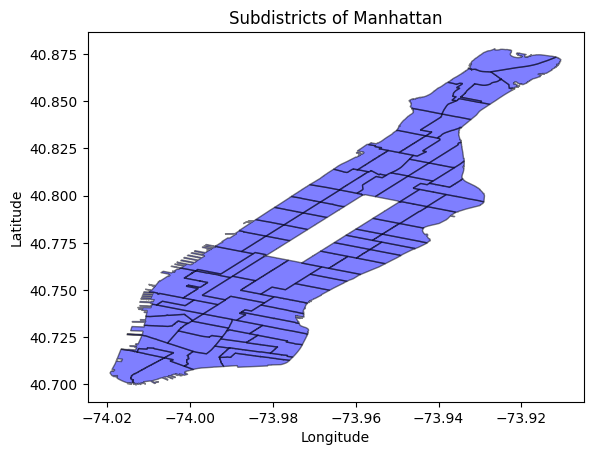

In [106]:
# Sample list of lists of tuples (representing your polygons)
multipolygon_list = polygons

# Create the plot
fig, ax = plt.subplots()

# Loop over each polygon in the multipolygon list and plot it
for polygon_coords in multipolygon_list:
    # Unzip the coordinates into x and y
    x, y = zip(*polygon_coords)
    
    # Plot the polygon
    ax.fill(x, y, alpha=0.5, fc='blue', edgecolor='black', label="Polygon")

# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Subdistricts of Manhattan')

# Show the plot
plt.show()


### Plot Rat Occurrences

In [107]:
df = pd.read_csv('ratsheet.csv')
ratlocs = df['Location'].to_list()
filtered_ratlocs = [item for item in ratlocs if isinstance(item, str)]
filtered_ratlocs = [eval(point) for point in filtered_ratlocs]


C:\Users\carly\AppData\Local\Temp\ipykernel_22272\1028607899.py:1: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ratsheet.csv')


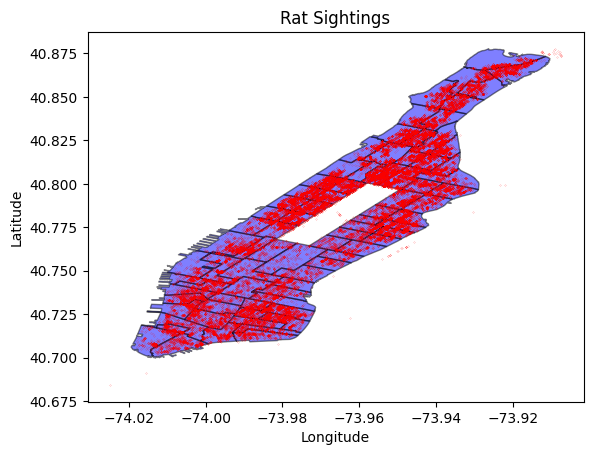

In [108]:
import matplotlib.pyplot as plt

# Sample list of tuples (x, y) for filtered_ratlocs

# Create the plot
fig, ax = plt.subplots()

# Unzip the coordinates into x and y
y, x = zip(*filtered_ratlocs)

# Plot the points (x, y) with smaller size
ax.scatter(x, y, color='red', zorder=5, s=0.01, label="Points")

# Loop over each polygon in the multipolygon list and plot it
for polygon_coords in multipolygon_list:
    # Unzip the coordinates into x and y
    x, y = zip(*polygon_coords)
    
    # Plot the polygon
    ax.fill(x, y, alpha=0.5, fc='blue', edgecolor='black', label="Polygon")
# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Rat Sightings')

# Show the plot
plt.show()


### Rats by subdistrict

In [109]:
SUBDIST = 'MN101'
FREQUENCY = 'B'

In [111]:
def is_point_in_polygon(point, vertices):
    y, x = point # NOTE THE Y, X BECAUSE RAT LOCS ARE REVERSED
    inside = False
    n = len(vertices)
    
    for i in range(n):
        j = (i + 1) % n
        xi, yi = vertices[i]
        xj, yj = vertices[j]
        
        if ((yi > y) != (yj > y)) and (x < (xj - xi) * (y - yi) / (yj - yi) + xi):
            inside = not inside
            
    return inside

In [ ]:
rats_by_subdist = []
for name in names:
    subdistrict = subdist_dict[name]
    subdist_rats = list(filter(lambda x: is_point_in_polygon(x, subdistrict), filtered_ratlocs))
    num_rats = len(subdist_rats)
    print(name, num_rats)
    rats_by_subdist.append((name,num_rats))

### Street Busy-ness

In [ ]:
df_roads = pd.read_csv('road12s.csv')

In [121]:

# Function to parse WKT and calculate the average coordinates
def calculate_avg_coordinates(wkt_str):
    # Extract the coordinates part (between the parentheses)
    coords_str = wkt_str.split('((')[1].split('))')[0]
    
    # Split the coordinates by commas and strip extra spaces
    coords = [tuple(map(float, coord.split())) for coord in coords_str.split(',')]
    
    # Calculate the averages of x and y
    avg_x = sum(coord[0] for coord in coords) / len(coords)
    avg_y = sum(coord[1] for coord in coords) / len(coords)
    
    return (avg_x, avg_y)

# Apply the function to the DataFrame and create a new column for average coordinates
df_roads['avg_coords'] = df_roads['the_geom'].apply(calculate_avg_coordinates)



In [ ]:
df_roads['avg_coords'].to_list

0        (-73.98966446750634, 40.73569775248085)
1          (-73.989868101351, 40.73536717859594)
2        (-74.00896884223638, 40.73937773650022)
3         (-74.0132324587776, 40.70238987732152)
4         (-73.97668369759398, 40.7517064828617)
                          ...                   
3177     (-73.95326290176286, 40.77981103905738)
3178      (-73.9893293998864, 40.74634785087963)
3179    (-73.98138675356057, 40.747099220697535)
3180      (-73.98203887889818, 40.7779745475804)
3181    (-73.93881692183275, 40.799573881320036)
Name: avg_coords, Length: 3182, dtype: object